# Streaming

## What are the Streaming technics available?

1. 

In [4]:
from langgraph.checkpoint.memory import MemorySaver
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
import os
from dotenv import load_dotenv

load_dotenv()
memory = MemorySaver()

In [3]:
# define a state
class State(TypedDict):
    # messages have the type 'list'. The 'add_messages' function
    # in the annotation defines how this state key should be updated
    # (in the case, it appends messages to the list, rather than overwriting them)
    # Annotated 
    messages: Annotated[list, add_messages]

In [5]:
from langchain_groq import ChatGroq
from langchain .chat_models import init_chat_model # 2nd approach to use llm models

llm = ChatGroq(model='llama-3.1-8b-instant')

c:\Users\virub\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
def superbot(state: State):
    return {'messages': [llm.invoke(state['messages'])]}

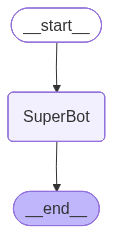

In [8]:
graph = StateGraph(State)

# add nodes
graph.add_node("SuperBot", superbot)

# add edges
graph.add_edge(START, "SuperBot")
graph.add_edge("SuperBot", END)

graph_builder = graph.compile(checkpointer=memory)

graph_builder

In [9]:
# Invocation

config = {'configurable': {'thread_id': '1'}}

graph_builder.invoke({'messages': 'Hi, My name is Raju and i like Cricket'}, config = config)

{'messages': [HumanMessage(content='Hi, My name is Raju and i like Cricket', additional_kwargs={}, response_metadata={}, id='40497c6d-109a-4fed-bb98-00604fdd4db0'),
  AIMessage(content="Hello Raju, nice to meet you. Cricket is a great sport, isn't it? Which team do you support? Are you from India?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 46, 'total_tokens': 77, 'completion_time': 0.042568551, 'prompt_time': 0.002874829, 'queue_time': 0.050888681, 'total_time': 0.04544338}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--cb5a8029-dffb-466c-9478-1839f303d731-0', usage_metadata={'input_tokens': 46, 'output_tokens': 31, 'total_tokens': 77})]}

## Streaming

##### Methods: .stream() and astream()

- These methods are sync and async methods for streaming back results.

##### Additional parameters in streaming modes for graph state

- values : This streams the full state of the graph after each node is called.
- updates : This streams updates to the state of the graph after each node is called.


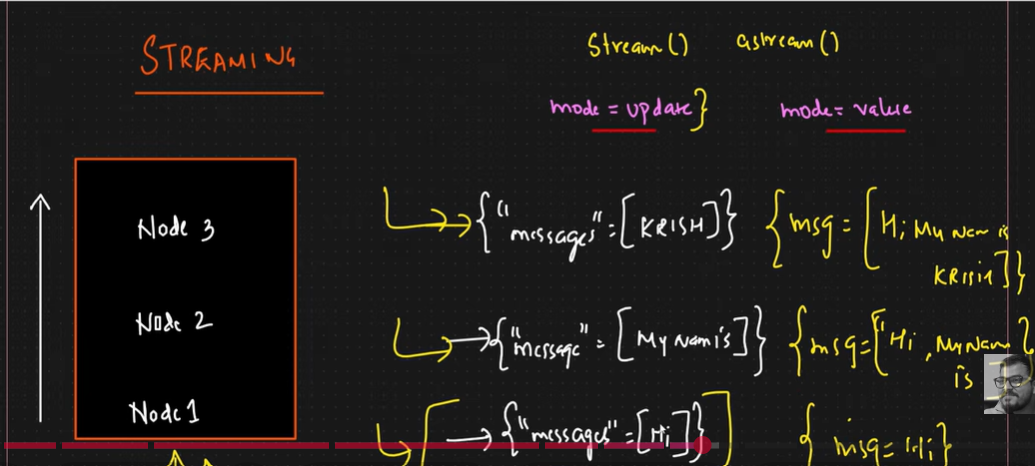

In [ ]:
config = {'configurable': {'thread_id': '2'}}

# updates will give a just AI message
for chunk in graph_builder.stream({'messages': 'Hi, my name is Raju And I like Cricket'}, config, stream_mode='updates'):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="Namaste! Nice to meet you, Raju. Cricket is a fantastic sport, isn't it? Which team do you support? Are you a fan of Indian cricket, or do you have a favorite international team?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 45, 'prompt_tokens': 46, 'total_tokens': 91, 'completion_time': 0.069088771, 'prompt_time': 0.002133152, 'queue_time': 0.056119438, 'total_time': 0.071221923}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--8ba8a1aa-b8a6-438a-a583-299951d07587-0', usage_metadata={'input_tokens': 46, 'output_tokens': 45, 'total_tokens': 91})]}}


In [ ]:
# values will give you Human message + ai message
for chunk in graph_builder.stream({'messages': 'Hi, my name is Raju And I like Cricket'}, config, stream_mode='values'):
    print(chunk)

{'messages': [HumanMessage(content='Hi, my name is Raju And I like Cricket', additional_kwargs={}, response_metadata={}, id='255464fd-fa47-47e2-943d-329c7e26f49c'), AIMessage(content="Namaste! Nice to meet you, Raju. Cricket is a fantastic sport, isn't it? Which team do you support? Are you a fan of Indian cricket, or do you have a favorite international team?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 45, 'prompt_tokens': 46, 'total_tokens': 91, 'completion_time': 0.069088771, 'prompt_time': 0.002133152, 'queue_time': 0.056119438, 'total_time': 0.071221923}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--8ba8a1aa-b8a6-438a-a583-299951d07587-0', usage_metadata={'input_tokens': 46, 'output_tokens': 45, 'total_tokens': 91}), HumanMessage(content='Hi, my name is Raju And I like Cricket', additional_kwargs={}, response_metadata={}, id='9ddc3e40-be87-41ad-a57f-531a6ffd8

In [12]:
config = {'configurable': {'thread_id': '4'}}
for chunk in graph_builder.stream({'messages': 'Hi, my name is Raju And I like Cricket'}, config, stream_mode='updates'):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content="Namaste Raju, nice to meet you. Cricket is an amazing sport, and it's great to hear that you're a fan. Which team or player is your favorite? Are you a fan of the Indian cricket team, or do you have a soft spot for another team like Australia, England, or Pakistan?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 65, 'prompt_tokens': 46, 'total_tokens': 111, 'completion_time': 0.100613564, 'prompt_time': 0.002317107, 'queue_time': 0.049356893, 'total_time': 0.102930671}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--e59543f6-e62e-4d0e-9d08-e55dfe4a77ea-0', usage_metadata={'input_tokens': 46, 'output_tokens': 65, 'total_tokens': 111})]}}


In [13]:
for chunk in graph_builder.stream({'messages': 'I also like kabaddi'}, config, stream_mode='values'):
    print(chunk)

{'messages': [HumanMessage(content='Hi, my name is Raju And I like Cricket', additional_kwargs={}, response_metadata={}, id='b2db9ced-2f2c-42a6-ab7c-d8f46a6896ef'), AIMessage(content="Namaste Raju, nice to meet you. Cricket is an amazing sport, and it's great to hear that you're a fan. Which team or player is your favorite? Are you a fan of the Indian cricket team, or do you have a soft spot for another team like Australia, England, or Pakistan?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 65, 'prompt_tokens': 46, 'total_tokens': 111, 'completion_time': 0.100613564, 'prompt_time': 0.002317107, 'queue_time': 0.049356893, 'total_time': 0.102930671}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--e59543f6-e62e-4d0e-9d08-e55dfe4a77ea-0', usage_metadata={'input_tokens': 46, 'output_tokens': 65, 'total_tokens': 111}), HumanMessage(content='I also like kabaddi', additional_

### astream

In [ ]:
# debugging purpose we can use this

config = {'configurable': {'thread_id': '5'}}
async for chunk in graph_builder.astream_events({'messages': ['Hi, my name is Raju And I like Cricket']}, config, version='v2'):
    print(chunk)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi, my name is Raju And I like Cricket']}}, 'name': 'LangGraph', 'tags': [], 'run_id': '7580fb31-9db1-4aef-8995-edbcf82ce24c', 'metadata': {'thread_id': '5'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi, my name is Raju And I like Cricket', additional_kwargs={}, response_metadata={}, id='ff61beba-4dd7-419b-8af4-3047969846ec')]}}, 'name': 'SuperBot', 'tags': ['graph:step:1'], 'run_id': 'cc86c75e-55da-4132-8850-39f57b4a703c', 'metadata': {'thread_id': '5', 'langgraph_step': 1, 'langgraph_node': 'SuperBot', 'langgraph_triggers': ('branch:to:SuperBot',), 'langgraph_path': ('__pregel_pull', 'SuperBot'), 'langgraph_checkpoint_ns': 'SuperBot:d2d07ddc-198b-a43f-060e-b16f76370381'}, 'parent_ids': ['7580fb31-9db1-4aef-8995-edbcf82ce24c']}
{'event': 'on_chat_model_start', 'data': {'input': {'messages': [[HumanMessage(content='Hi, my name is Raju And I like Cricket', additional_k